## Welcome to the wedap demo!
---
**wedap** : **w**eighted **e**nsemble **d**ata **a**nalysis and **p**lotting (pronounced we-dap)
<p>
    <img src="wedap-logo-black.png" alt="wedap logo" width="300" align="left">
</p>

Here, we will go through many examples of how to use the Python API or the command line for various types of plots using wedap and mdap. Note that the CLI will tend to format and label more things for you, while the API starts as more of a "blank slate" format wise since the options can be more easily adjusted.

Each of these examples are presented in the same order as in the wedap paper, which you can refer to for more details about each plot.

In [1]:
import wedap
import matplotlib.pyplot as plt

In [2]:
# optionally apply default wedap matplotlib style sheet
plt.style.use("default.mplstyle")

## The first set of examples is for basic wedap usages with WESTPA H5 data.
---
Note that if the command line can generate the example plot, the shell command will be shown before the Python code. Also note that the command line arguments will all use a hyphen to separate multi-word arguments while in Python these will be represented by underscores, e.g. `--data-type` or `--p-units` as command line arguments will be equivalently in Python `data_type` or `p_units`.


Running `wedap -h` or `wedap --help` on the command line is very useful for a summary of the command options, along with some basic usage examples.
<p align="left">
    <img src="cli2.png" alt="CLI --help" width="600">
</p>

To use the GUI, simply run `wedap` in the command line with no arguments and the popup should look something this:
<p align="left">
    <img src="gui3_postproc.png" alt="GUI" width="400">
</p>
Reading through the GUI options and their associated descriptions can also be useful to find out more about them.

### Example 1: Evolution Plot

This is a classic plot of the evolution of a WE simulation, plotting the probability distribution on the X axis as you progress through each iteration of the WE simulation on the Y axis. The colorbar is showing the probability values of each bin in the histogram. The probability values are derived from the raw data count values of the multiple segments in each WE iteration in the west.h5 file, weighted by each segment weight. This weighted histogram is normalized and shown on an inverted natural log scale: $-\ln(\frac{P(x)}{P(max)})$

```
$ wedap -W p53.h5 --data-type evolution --xlabel "Progress Coordinate 0"
```

Evolution:   0%|          | 0/19 [00:00<?, ?it/s]

Text(7.375, 0.5, 'WE Iteration')

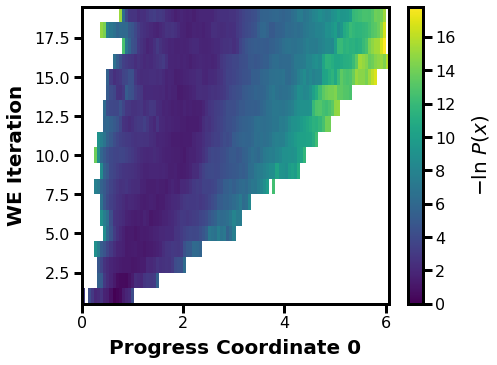

In [5]:
wedap.H5_Plot(h5="p53.h5", data_type="evolution").plot()
plt.xlabel("Progress Coordinate 0")
plt.ylabel("WE Iteration")

Alternatively we can use the mpl object-based interface, this offers more flexibility when making more complex plots, examples of which will be demonstrated later along in this notebook.

Evolution:   0%|          | 0/19 [00:00<?, ?it/s]

Text(0.45, 1.02, 'Evolution Plot')

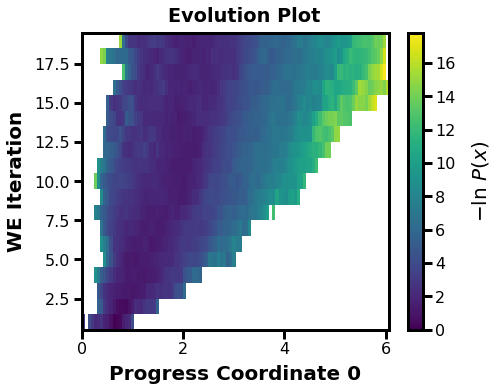

In [55]:
# instantiate the wedap H5_Plot class
wedap_obj = wedap.H5_Plot(h5="p53.h5", data_type="evolution")
# run the main plotting method
wedap_obj.plot()
# call the mpl axes object (ax) from wedap class object and format
wedap_obj.ax.set_xlabel("Progress Coordinate 0")
wedap_obj.ax.set_ylabel("WE Iteration")
# the fig object can also be called
wedap_obj.fig.suptitle("Evolution Plot", x=0.45, y=1.02)

We can break the process down further to access the data being passed:

Evolution:   0%|          | 0/19 [00:00<?, ?it/s]

Text(0.45, 1.02, 'Evolution Plot')

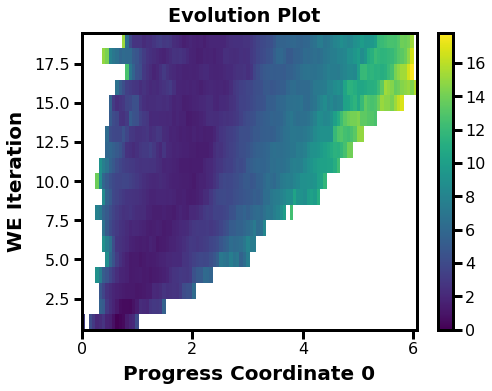

In [62]:
# run the wedap H5_Pdist class main method
X, Y, Z = wedap.H5_Pdist(h5="p53.h5", data_type="evolution").pdist()

# pass datasets to H5_Plot
wedap_obj = wedap.H5_Plot(X, Y, Z)
wedap_obj.plot()

# call the mpl axes object (ax) from wedap class object and format
wedap_obj.ax.set_xlabel("Progress Coordinate 0")
wedap_obj.ax.set_ylabel("WE Iteration")
# the fig object can also be called
wedap_obj.fig.suptitle("Evolution Plot", x=0.45, y=1.02)

### Example 2: 1D Probability Distribution

You can also make simple 1D plots for a single iteration `--data-type instant` || `data_type='instant'` or for the average of a range of iterations `--data-type average` || `data_type='average'`. Here we show the average probability distribution for the entire range of WE iterations in the input west.h5 file.

```
$ wedap -W p53.h5 -dt average --plot-mode line --xlabel "Progress Coordinate 0"
```

Average 1D:   0%|          | 0/19 [00:00<?, ?it/s]

Text(0.5, 10.0, 'Progress Coordinate 0')

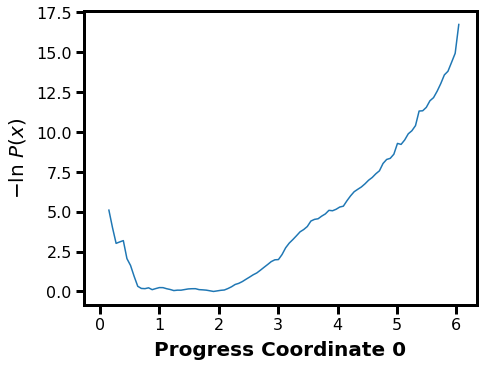

In [17]:
wedap.H5_Plot(h5="p53.h5", data_type="average", plot_mode="line").plot()
plt.xlabel("Progress Coordinate 0")

### Example 3: 2D Probability Distribution

We can also make probability distributions using two datasets, first we can try this with just our two dimensional progress coordinates. Note that you can set the progress coordinate or any aux dataset index using `Xindex`, `Yindex`, and `Zindex`. This can be useful for multi-dimensional progress coordinates, but also for multi-dimensional auxiliary data.

```
$ wedap -W p53.h5 --xlabel "Progress Coordinate 0" -dt average  \
        -y pcoord -yi 1 --ylabel "Progress Coordinate 1"
```

Average 2D:   0%|          | 0/19 [00:00<?, ?it/s]

Text(22.625, 0.5, 'Progress Coordinate 1')

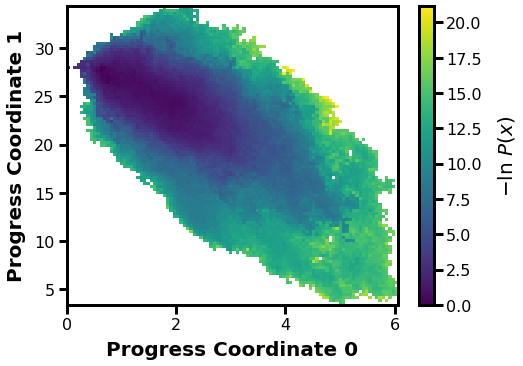

In [104]:
wedap.H5_Plot(h5="p53.h5", data_type="average", Xindex=0, Yname="pcoord", Yindex=1).plot()
plt.xlabel("Progress Coordinate 0")
plt.ylabel("Progress Coordinate 1")

Now we can try it with one progress coordinate and an auxiliary dataset saved during the WE simulation of calculated post-simulation (e.g. using `w_crawl`):

```
$ wedap -W p53.h5 --xlabel "Progress Coordinate 1" -xi 1 -dt average  -y dihedral_11 --ylabel "Aux Coordinate"
```

Average 2D:   0%|          | 0/19 [00:00<?, ?it/s]

Text(-0.875, 0.5, 'Aux Coordinate')

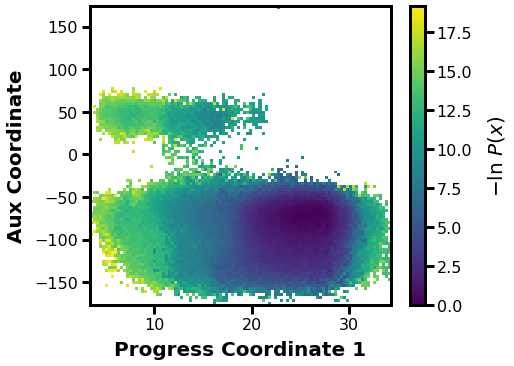

In [6]:
wedap.H5_Plot(h5="p53.h5", data_type="average", Xindex=1, Yname="dihedral_11").plot()
plt.xlabel("Progress Coordinate 1")
plt.ylabel("Aux Coordinate")

### Example 4: 3D Scatter Plot

What if you don't want to show the probability axis? Well, you can also just show how three different datasets are related in a 3D scatter plot. Here we can put two different aux datasets on the X and Y axes and we can set the colorbar to show the progress coordinate values in comparison:

```
$ wedap -W p53.h5 --xlabel "Aux Coordinate 0" -x dihedral_11  -dt average  -y dihedral_12 --ylabel "Aux Coordinate 1" -z pcoord --cbar-label "Progress Coordinate 0" -pm scatter3d
```

Average 3D:   0%|          | 0/19 [00:00<?, ?it/s]

Text(-0.875, 0.5, 'Aux Coordinate 1')

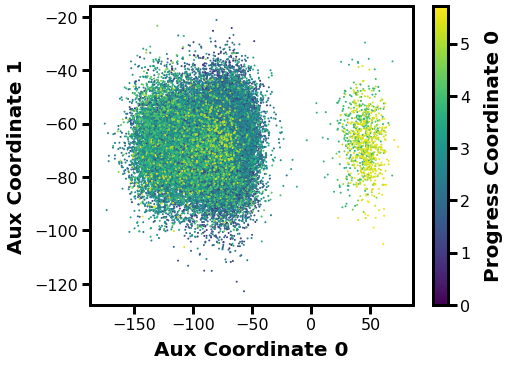

In [11]:
wedap.H5_Plot(h5="p53.h5", data_type="average", plot_mode="scatter3d", 
              Xname="dihedral_11", Yname="dihedral_12", Zname="pcoord",
              cbar_label="Progress Coordinate 0").plot()
plt.xlabel("Aux Coordinate 0")
plt.ylabel("Aux Coordinate 1")

### Example 5: Joint Plot with Multiple Extra Features

Here, I want to demonstrate some of the additional features available by making a more complicated joint plot. This is using a contour plot instead of a histogram, as set by `--plot-mode contour` || `plot_mode='contour'`, there is also custom colormapping (`--cmap`), probability units (`--p-units`), iteration ranges (`--first-iter`, `--last-iter`), probability limits (`--pmin`, `--pmax`), plot style (`--style`), data smoothing (`--smoothing-level`), and plot limits (`--xlim`, `--ylim`).


Available `--plot-mode` || `plot_mode` options:
* line -- plot 1D lines.
* hist -- plot histogram (default).
* hist_l -- plot histogram and contour lines.
* contour -- plot contour levels and lines.
* contour_f -- plot contour levels
* contour_l -- plot contour lines only.
* scatter3d -- plot 3 datasets in a scatter plot.

```
$ wedap -W p53.h5 --xlabel "Progress Coordinate 0" -xi 0  -dt average  -y dihedral_11 --ylabel "Aux Coordinate" --joint-plot -pm contour_f --cmap gnuplot_r --style ggplot --p-units kcal --first-iter 3 --last-iter 15 --pmin 1 --pmax 10 --smoothing-level 1 --xlim -1 7 --ylim -180 180
```

Average 2D:   0%|          | 0/13 [00:00<?, ?it/s]

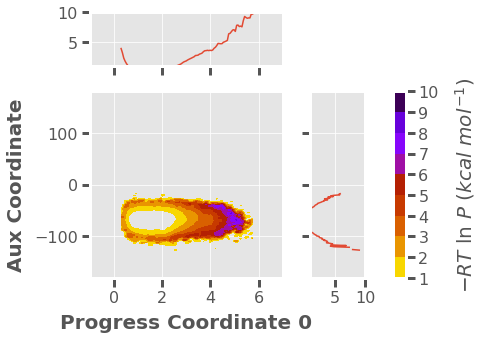

In [36]:
# if there is alot of plotting choices, it can be easier to just put it all into a dictionary
plot_options = {"h5" : "p53.h5",
                "data_type" : "average", 
                "plot_mode" : "contour_f", 
                "Xname" : "pcoord", 
                "Yname" : "dihedral_12", 
                "cmap" : "gnuplot_r",
                "jointplot" : True, 
                "p_units" : "kcal",
                "first_iter" : 3, 
                "last_iter" : 15, 
                "p_min" : 1, 
                "p_max" : 10,
                "smoothing_level" :1,
                # the input plot_options kwarg dict is also parsed for matplotlib formatting keywords
                "xlabel" : "Progress Coordinate 0",
                "ylabel" : "Aux Coordinate",
                "xlim" : (-1, 7),
                "ylim" : (-180, 180),
                }
#plt.style.use("ggplot")
wedap.H5_Plot(**plot_options).plot()

In [38]:
# change style back to wedap default
#plt.style.use("default.mplstyle")

## The next set of examples is with mdap: plotting directly from standard MD data
---
**mdap** : **m**olecular **d**ynamics **a**nalysis and **p**lotting (pronounced em-dap)

The input data from standard MD simulations must be in >=2 column format:
use hash symbols (#) at top of data file to indicate comments (skipped lines)

COL1:Frame | COL2:Data | COL3:Data...

This data can be output from anywhere, but just as long as it's formatted as a text, numpy binary (`.npy`), or pickle (`.pkl`) file, it can be read into `mdap`.

In [1]:
import mdap
import matplotlib.pyplot as plt

In [2]:
# optionally apply default wedap matplotlib style sheet
plt.style.use("default.mplstyle")

### Example 6: 1D Probability Distribution

We can make the same 1D line plot of the probability from any input data file. Note that if you have multiple replicates that you want to plot together, you can just include more data files after the X axis data input flag (`-X or --Xname file1.txt file2.txt ...` and in Python you can input a list of file names into `mdap.MD_Pdist(Xname=[])`). Here, I am including just one file for the examples.

```
$ mdap -x rms_bb_xtal.dat --xlabel "Input Data 0" -pm line
```

Text(0.5, 6.0, 'Input Data 0')

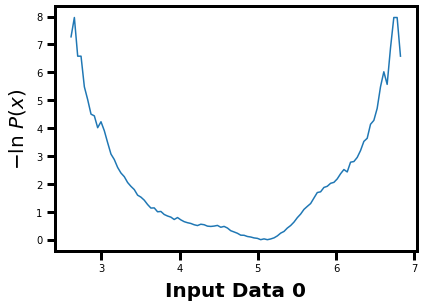

In [3]:
mdap.MD_Plot(plot_mode="line", Xname=["rms_bb_xtal.dat"], data_type="pdist").plot()
plt.xlabel("Input Data 0")

Next up, a 2D probability distribution:

```
$ mdap -x rms_bb_xtal.dat -y rms_bb_nmr.dat --xlabel "Input Data 0" --ylabel "Input Data 1”
```

Text(18.0, 0.5, 'Input Data 1')

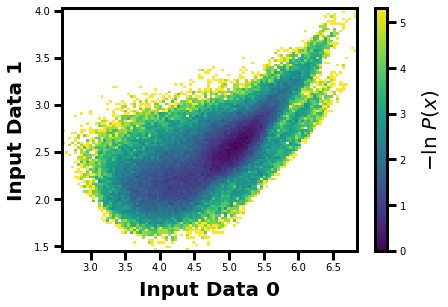

In [4]:
mdap.MD_Plot(Xname=["rms_bb_xtal.dat"], Yname=["rms_bb_nmr.dat"], data_type="pdist").plot()
plt.xlabel("Input Data 0")
plt.ylabel("Input Data 1")

Next up, a scatter plot using 3 input datasets and notice how we can use a numpy binary file as input (`.npy`):

```
$ mdap -x rms_bb_xtal.dat -y rms_bb_nmr.dat --xlabel "Input Data 0" --ylabel "Input Data 1" -z c2_angle.npy --cbar-label "Input Data 2" -pm scatter3d
```

Text(18.0, 0.5, 'Input Data 1')

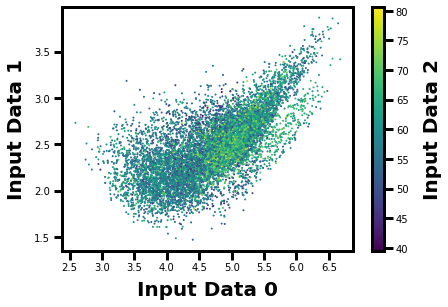

In [5]:
mdap.MD_Plot(Xname=["rms_bb_xtal.dat"], Yname=["rms_bb_nmr.dat"], Zname=["c2_angle.npy"], 
             data_type="pdist", cbar_label="Input Data 2", plot_mode="scatter3d").plot()
plt.xlabel("Input Data 0")
plt.ylabel("Input Data 1")

For the last example in the `mdap` set, we can again demonsrate a variety of extra features, many of which are the same as with `wedap`. Something that is unique with `mdap` is that you can set `--Xinterval` || `MD_Plot.Xinterval` to apply to X Y or Z data (changing X to Y or Z in the arguments). This can adjust the size of your datasets if there is a mismatch (e.g. if you saved one dataset every 10 frames and the other every single frame). We can also see here that the `--contour-interval` or `-ci` argument was used, which sets the interval of each contour level. The Y axis data is also being indexed to position 2, so if the input dataset has multiple columns they can all be accessed like this. Finally we set the `--style` argument to `None`, which sets everything back to the matplotlib plotting defaults.

```
$ mdap -x rms_bb_xtal.dat -y o_angle.dat --xlabel "Input Data 0" --ylabel "Input Data 3" --Yindex 2 --Xinterval 10 -pm contour --color k --style None --p-units kT --contour-interval 0.5 --smoothing-level 2 --cmap gnuplot_r -jp --xlim 2 8 --ylim 20 60 --pmin 0.5
```

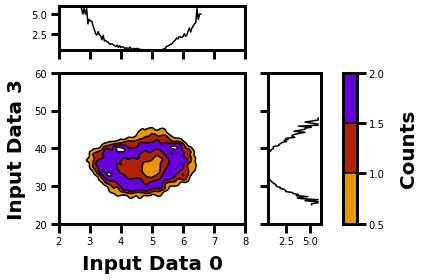

In [10]:
mdap.MD_Plot(Xname=["rms_bb_xtal.dat"], Yname=["o_angle.dat"], Yindex=2, color="k", p_min=0.5,
             contour_interval=0.5, smoothing_level=2, cmap="gnuplot_r", jointplot=True,
             data_type="pdist", Xinterval=10, plot_mode="contour", p_units="kT",
             xlabel="Input Data 0", ylabel="Input Data 3", xlim=(2, 8), ylim=(20, 60)).plot()

## The next set of examples is to show more advanced wedap capabilities
---

### Example 7: Multi-panel Probability Distributions

Here, we can make a plot showcasing multiple aux datasets and how they relate to the progress coordinate.

Text(9.280000000000001, 0.5, 'Dihedral Angle (°)')

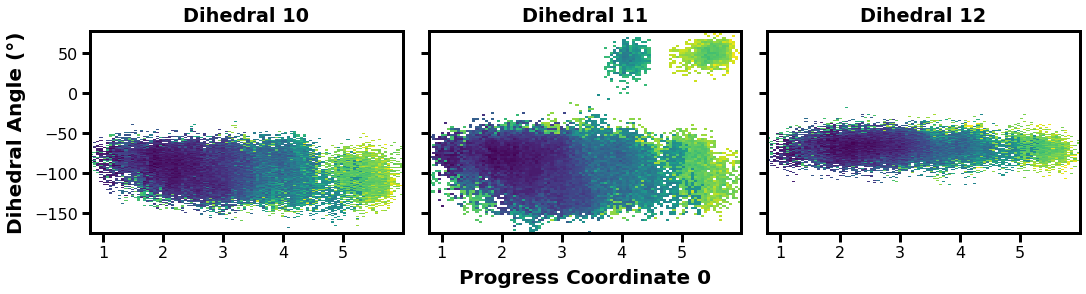

In [30]:
fig, axs = plt.subplots(ncols=3, nrows=1, sharex=True, sharey=True, figsize=(15,4))

for i, ax in enumerate(axs):
    wedap.H5_Plot(h5="p53.h5", data_type="instant", ax=ax,
                  Xname="pcoord", Yname=f"dihedral_{i+10}").plot(cbar=False)
    ax.set_title(f"Dihedral {i+10}")

axs[1].set_xlabel("Progress Coordinate 0")
axs[0].set_ylabel("Dihedral Angle (°)")

Since dihedral 11 looks interesting, we can make another multi-panel plot to showcase the time evolution.

Average 2D:   0%|          | 0/7 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/7 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/7 [00:00<?, ?it/s]

Text(9.280000000000001, 0.5, 'Dihedral Angle (°)')

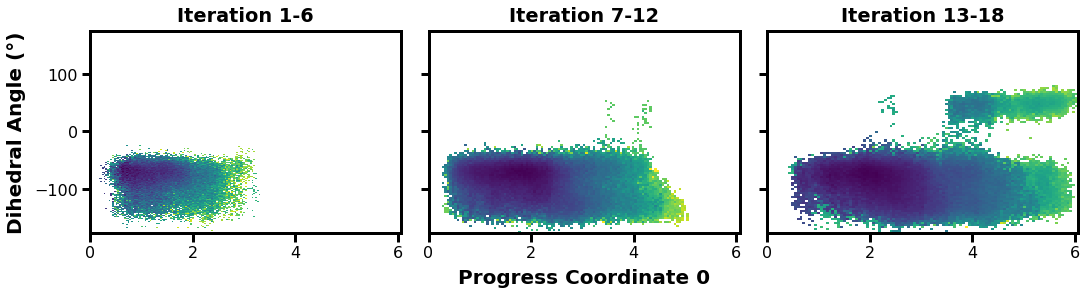

In [56]:
fig, axs = plt.subplots(ncols=3, nrows=1, sharex=True, sharey=True, figsize=(15,4))

i = 1
for ax in axs:
    wedap.H5_Plot(h5="p53.h5", data_type="average", ax=ax, first_iter=i, last_iter=i+6,
                  Xname="pcoord", Yname="dihedral_11").plot(cbar=False)
    ax.set_title(f"Iteration {i}-{i+5}")
    i += 6
        
axs[1].set_xlabel("Progress Coordinate 0")
axs[0].set_ylabel("Dihedral Angle (°)")

### Example 8: Multiple Datasets on One Plot

We can also directly compare multiple aux or pcoord datasets on a single axis.

Average 1D:   0%|          | 0/19 [00:00<?, ?it/s]

Average 1D:   0%|          | 0/19 [00:00<?, ?it/s]

Average 1D:   0%|          | 0/19 [00:00<?, ?it/s]

Average 1D:   0%|          | 0/19 [00:00<?, ?it/s]

Average 1D:   0%|          | 0/19 [00:00<?, ?it/s]

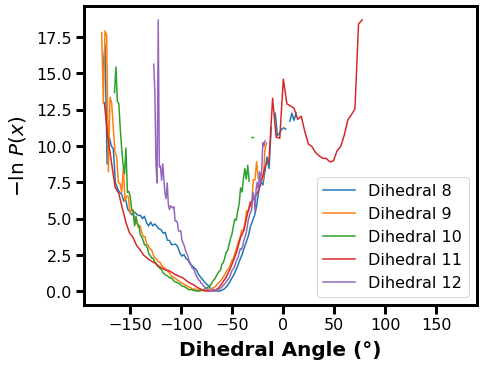

In [63]:
fig, ax = plt.subplots()

for i in range(8, 13):
    wedap.H5_Plot(h5="p53.h5", data_type="average", ax=ax, plot_mode="line",
                  Xname=f"dihedral_{i}", data_label=f"Dihedral {i}").plot()

ax.set_xlabel("Dihedral Angle (°)")
plt.legend()

### Example 9: Tracing Trajectories

We often want to see how a single continuous trajectory evolves as the WE simulation progresses. 

If we want to trace the path to get to iteration 18 and segment 1:

```
$ wedap -W p53.h5 --xlabel "Progress Coordinate 0" -dt average  \
        -y dihedral_11 --ylabel "Aux Coordinate" --trace-seg 18 1
```

Average 2D:   0%|          | 0/19 [00:00<?, ?it/s]

Text(-0.875, 0.5, 'Aux Coordinate')

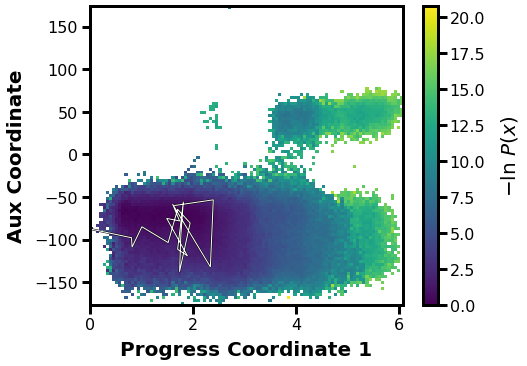

In [68]:
wedap_obj = wedap.H5_Plot(h5="p53.h5", data_type="average", Xindex=0, Yname="dihedral_11")
wedap_obj.plot()
wedap_obj.plot_trace((18,1), ax=wedap_obj.ax)
plt.xlabel("Progress Coordinate 1")
plt.ylabel("Aux Coordinate")

Or we can trace by values, let's say we want to find a walker that goes to a pcoord value of 5.8 and an aux value of 50:

```
$ wedap -W p53.h5 --xlabel "Progress Coordinate 0" -dt average  \
        -y dihedral_11 --ylabel "Aux Coordinate" --trace-val 5.8 50
```

Average 2D:   0%|          | 0/19 [00:00<?, ?it/s]

Go to ITERATION: 19 and SEGMENT: 331


Text(-0.875, 0.5, 'Aux Coordinate')

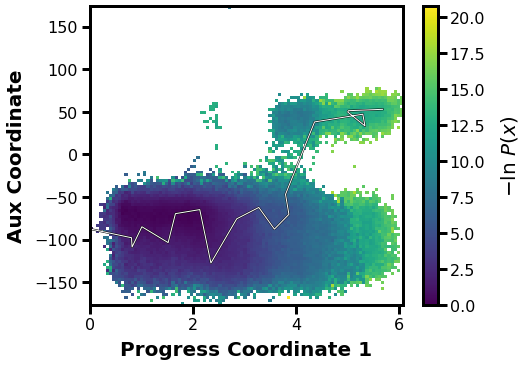

In [70]:
wedap_obj = wedap.H5_Plot(h5="p53.h5", data_type="average", Xindex=0, Yname="dihedral_11")
wedap_obj.plot()
iter, seg = wedap_obj.search_aux_xy_nn(5.8, 50)
wedap_obj.plot_trace((iter, seg), ax=wedap_obj.ax)
plt.xlabel("Progress Coordinate 1")
plt.ylabel("Aux Coordinate")

We also get an output line of which iteration and segment the trace cooresponds to.

### Example 10: Making a GIF

Let's now make a GIF of our data, here I am using the dihedral 11 aux dataset and looping through the averages of small sets of iteration ranges, but anything could be looped to make the GIF using this example as a template.

In [72]:
import gif

In [88]:
# plots should not be saved with any transparency
import matplotlib as mpl
mpl.rcParams["savefig.transparent"] = False
mpl.rcParams["savefig.facecolor"] = "white"

In [89]:
# decorate a plot function with @gif.frame (return not required):
@gif.frame
def plot(iteration, avg_plus=100):
    """
    Make a gif of multiple wedap plots.

    Parameters
    ----------
    iteration : int
        Plot a specific iteration.
    avg_plus : int
        With an average plot, this is the value added to iteration.
    """
    plot_options = {"h5" : "p53.h5",
                    "Xname" : "pcoord",
                    "Yname" : "dihedral_11",
                    "data_type" : "average",
                    "p_max" : 12,
                    "p_units" : "kcal",
                    "first_iter" : iteration,
                    "last_iter" : iteration + avg_plus,
                    "plot_mode" : "hist",
                    "ylabel" : "Dihedral Angle (°)",
                    "xlabel" : "Progress Coordinate 0",
                    "title" : f"WE Iteration {iteration} to {iteration + avg_plus}",
                    "xlim" : (0, 6),
                    "ylim" : (-180, 180),
                    "grid" : True,
                    "cmap" : "gnuplot_r",
                    }
    
    we = wedap.H5_Plot(**plot_options)
    we.plot()

# build a bunch of "frames"
# having at least 100 frames makes for a good length gif
frames = []
# set the range to be the iterations at a specified interval
for i in range(1, 19):
    frame = plot(i, avg_plus=2)
    frames.append(frame)

# specify the duration between frames (milliseconds) and save to file:
gif.save(frames, "example.gif", duration=50)

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

Average 2D:   0%|          | 0/3 [00:00<?, ?it/s]

The resulting GIF is shown below:

<p align="left">
    <img src="example.gif" alt="example gif" width="400" align="left">
</p>

### Example 11: Data Extraction for Machine Learning with scikit-learn

In this final example, I will go through how to extract data from a west.h5 file using wedap and then we can directly pass the data to other Python libraries such as scikit-learn to do some clustering and pca.

In [122]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

Getting Data Array:   0%|          | 0/19 [00:00<?, ?it/s]

Getting Data Array:   0%|          | 0/19 [00:00<?, ?it/s]

Text(0, 0.5, 'PC2')

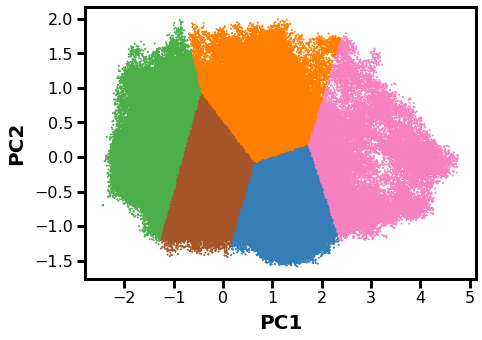

In [138]:
# load h5 file into pdist class
data = wedap.H5_Pdist("p53.h5", data_type="average")

# extract weights
weights = data.get_all_weights()

# extract data arrays (can be pcoord or any aux data name)
X = data.get_total_data_array("pcoord", 0)
Y = data.get_total_data_array("pcoord", 1)

# put X and Y together column wise
XY = np.hstack((X,Y))

# scale data
scaler = StandardScaler()
XY = scaler.fit_transform(XY)

# -ln(W/W(max)) weights
weights_expanded = -np.log(weights/np.max(weights))

# cluster pdist using weighted k-means
clust = KMeans(n_clusters=5).fit(XY, sample_weight=weights_expanded)

# create plot base
fig, ax = plt.subplots()

# get color labels
cmap = np.array(["#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628"])
colors = [cmap[label] for label in clust.labels_.astype(int)]

# plot on PCs
pca = PCA(n_components=2)
PCs = pca.fit_transform(XY)
ax.scatter(PCs[:,0], PCs[:,1], c=colors, s=1)

# labels
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

Now we have a plot along the first two principal components with cluster labels as the colors. Note that this isn't necessarily the most rigorous example, but more of a demonstration of how to use wedap with a library like sklearn.